<a href="https://colab.research.google.com/github/Aya-Elgammal/computer_vision-/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

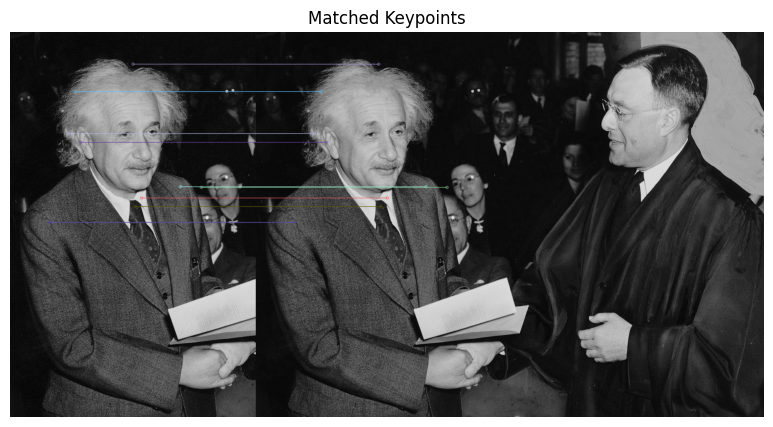

In [ ]:
def match_images(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors with SIFT
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Create a BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw the matches on the images
    matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return matched_img

img1 = cv2.imread('/content/sample_data/alberteinstein.jpg')
img2 = cv2.imread('/content/sample_data/albert-einstein group .jpg')
matched_image = match_images(img1, img2)

matched_image_rgb = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)

# Display the matched image using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(matched_image_rgb)
plt.axis('off')  # Hide axis
plt.title('Matched Keypoints')
plt.show()